1. Intervalo das variáveis de [-100,100]
2. Quantidade de variáveis: 30
3. 10 variáveis
4. Coeficiente Cognitivo(C1): 2.0
5. Coeficiente Social(C2): 2.0
6. Peso de Inércia(W): Decréscimo Linear 0.9 a 0.4
7. a) Configuração 1:
   1. Tamanho da população: 30
   2. Numero de iterações: 500
8. b) Configuração 2:
   1. Tamanho da população: 50
   2. Numero de iterações: 1000
9. c) Configuração 3:
   1. Tamanho da população: 100
   2. Numero de iterações: 2000

Primeira Função: High Conditioned Elliptic Function

Segunda Função: Shifted and Rotated Weierstrass Function

A resposta é a média, desvio padrão e mediana da melhor solução encontrada pelo algoritmo com cada uma das configurações de parâmetros. Inclua também o gráfico de best fitness do melhor resultado obtido.

In [ ]:
%pip install mealpy --quiet

## Optimize: Ackley Function
iter# 0: Fitness:15.57987, Position:[-8.97006129  2.78820812], Velocity:10.0
iter# 1: Fitness:15.57987, Position:[-8.97006129  2.78820812], Velocity:10.0
iter# 2: Fitness:14.58111, Position:[ 0.06022463 -8.92213687], Velocity:9.999999999999998
iter# 3: Fitness:14.58111, Position:[ 0.06022463 -8.92213687], Velocity:10.0
iter# 4: Fitness:14.58111, Position:[ 0.06022463 -8.92213687], Velocity:10.0
iter# 5: Fitness:12.86576, Position:[1.44050697 5.26140424], Velocity:10.0
iter# 6: Fitness:12.27342, Position:[1.42400434 5.09159048], Velocity:10.0
iter# 7: Fitness:12.18809, Position:[1.42117192 5.06244457], Velocity:10.0
iter# 8: Fitness:11.82414, Position:[ 0.43966446 -4.85916713], Velocity:10.0
iter# 9: Fitness:9.61228, Position:[-4.07315133  0.83079468], Velocity:10.0
iter# 10: Fitness:7.76148, Position:[ 3.1196687  -0.97265346], Velocity:10.0
iter# 11: Fitness:7.68669, Position:[ 2.81621831 -0.91186541], Velocity:10.000000000000002
iter# 12: Fitness:5.89321, 

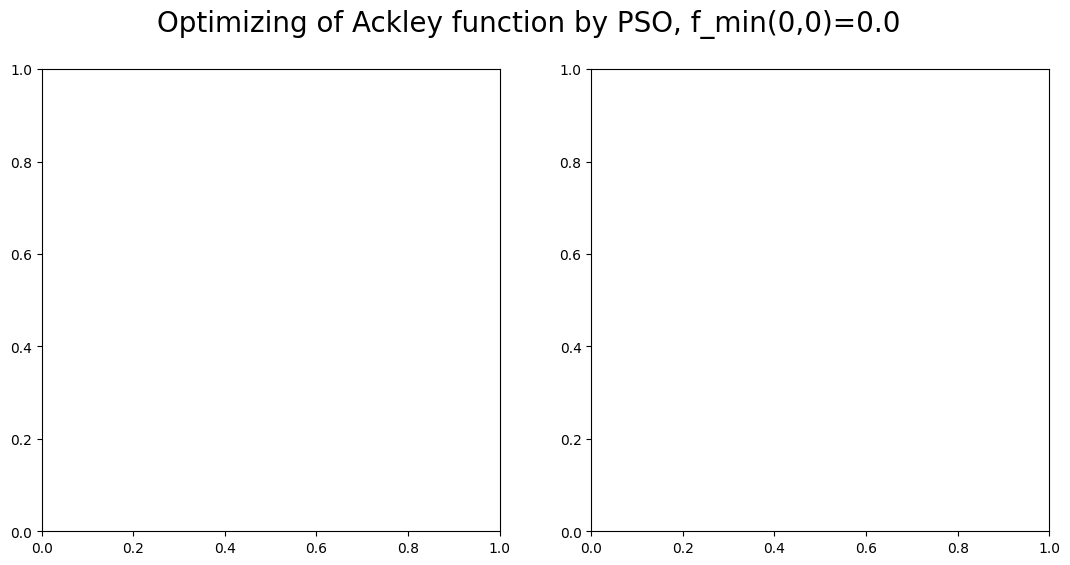

## Optimize: Rosenbrock Function
iter# 0: Fitness:2.87239, Position:[0.44940831 0.36225643], Velocity:1.9234536805930487
iter# 1: Fitness:0.89754, Position:[0.67411246 0.54338464], Velocity:5.422493840549971
iter# 2: Fitness:0.06938, Position:[0.78646454 0.63394875], Velocity:4.2791153158997535
iter# 3: Fitness:0.06585, Position:[0.79373003 0.61474069], Velocity:2.1827059313995574
iter# 4: Fitness:0.01449, Position:[0.92040897 0.85618577], Velocity:1.0731746864781515
iter# 5: Fitness:0.01449, Position:[0.92040897 0.85618577], Velocity:1.112315328970338
iter# 6: Fitness:0.01060, Position:[0.89859977 0.80926239], Velocity:1.632707598508196
iter# 7: Fitness:0.01060, Position:[0.89859977 0.80926239], Velocity:0.7885777279718165
iter# 8: Fitness:0.01060, Position:[0.89859977 0.80926239], Velocity:0.4459317089167819
iter# 9: Fitness:0.01060, Position:[0.89859977 0.80926239], Velocity:1.2333276670345075
iter# 10: Fitness:0.00950, Position:[0.90649523 0.82448023], Velocity:0.5414153942773322
i

c:\Users\j03n2\Documents\GitHub\heuristics\.venv\Lib\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


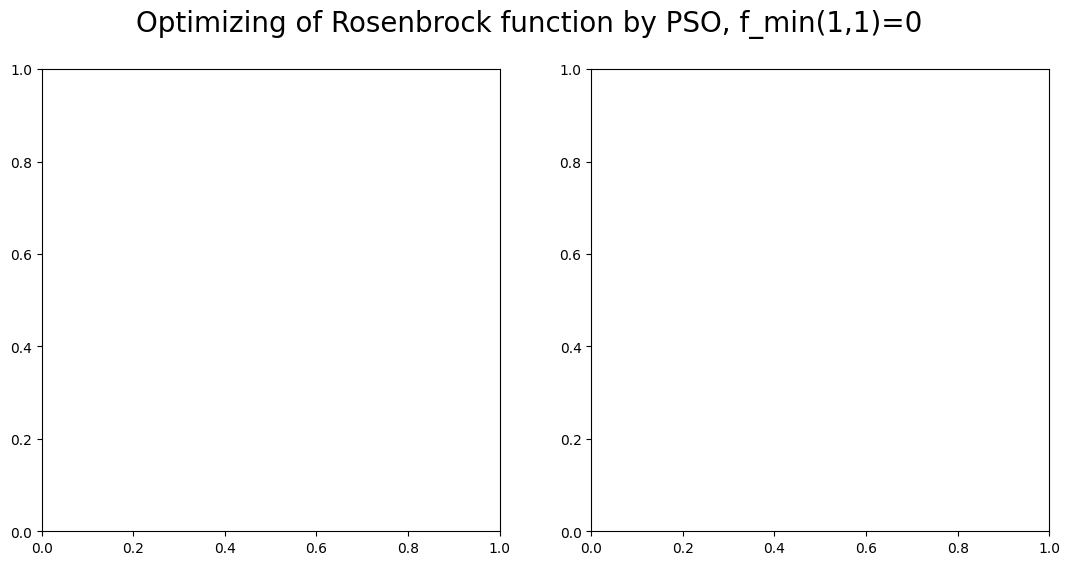

In [1]:
# =================================================================
#  Particle Swarm Optimization with Python and animated simulation
#
#  Reference:
#  - Particle swarm optimization - Wikipedia
#  https://en.wikipedia.org/wiki/Particle_swarm_optimization
#  - Test functions for optimization - Wikipedia
#  https://en.wikipedia.org/wiki/Test_functions_for_optimization
# =================================================================

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import animation
import os


def ackley_fun(x):
    """Ackley function
    Domain: -32 < xi < 32
    Global minimum: f_min(0,..,0)=0
    """
    return (
        -20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2)))
        - np.exp(0.5 * (np.cos(np.pi * 2 * x[0]) + np.cos(np.pi * 2 * x[1])))
        + np.exp(1)
        + 20
    )


def rosenbrock_fun(x):
    """Rosenbrock function
    Domain: -5 < xi < 5
    Global minimum: f_min(1,..,1)=0
    """
    return 100 * (x[1] - x[0] ** 2) ** 2 + (x[0] - 1) ** 2


def pso(
    func,
    bounds,
    swarm_size=10,
    inertia=0.5,
    pa=0.8,
    ga=0.9,
    max_vnorm=10,
    num_iters=100,
    verbose=False,
    func_name=None,
):
    """Particle Swarm Optimization (PSO)
    # Arguments
        func: function to be optimized
        bounds: list, bounds of each dimension
        swarm_size: int, the population size of the swarm
        inertia: float, coefficient of momentum
        pa: float, personal acceleration
        ga: float, global acceleration
        max_vnorm: max velocity norm
        num_iters: int, the number of iterations
        verbose: boolean, whether to print results or not
        func_name: the name of object function to optimize

    # Returns
        history: history of particles and global bests
    """
    bounds = np.array(bounds)
    assert np.all(
        bounds[:, 0] < bounds[:, 1]
    )  # each boundaries have to satisfy this condition
    dim = len(bounds)
    X = np.random.rand(swarm_size, dim)  # range:0~1, domain:(swarm_size,dim)
    print("## Optimize:", func_name)

    def clip_by_norm(x, max_norm):
        norm = np.linalg.norm(x)
        return x if norm <= max_norm else x * max_norm / norm

    # --- step 1 : Initialize all particle randomly in the search-space
    particles = X * (bounds[:, 1] - bounds[:, 0]) + bounds[:, 0]
    velocities = X * (bounds[:, 1] - bounds[:, 0]) + bounds[:, 0]
    personal_bests = np.copy(particles)
    personal_best_fitness = [np.inf for p in particles]  # np.inf
    # global_best_idx = -1 # np.inf
    # global_best = [np.inf, np.inf] # np.inf or particles[global_best_idx]
    # global_best_fitness = np.inf # func(global_best)
    global_best_idx = np.argmin(personal_best_fitness)
    global_best = personal_bests[global_best_idx]
    global_best_fitness = func(global_best)
    history = {
        "particles": [],
        "global_best_fitness": [],
        "global_best": [[np.inf, np.inf] for i in range(num_iters)],
        "obj_func": func_name,
    }

    # --- step 2 : Iteration starts
    for i in range(num_iters):
        history["particles"].append(particles)
        history["global_best_fitness"].append(global_best_fitness)
        # history['global_best'].append(global_best) # seems not working
        history["global_best"][i][0] = global_best[0]
        history["global_best"][i][1] = global_best[1]

        if verbose:
            print("iter# {}:".format(i), end="")
        # --- step 3 : Evaluate current swarm
        # personal best
        for p_i in range(swarm_size):
            fitness = func(particles[p_i])
            if fitness < personal_best_fitness[p_i]:
                personal_bests[p_i] = particles[p_i]  # particle
                personal_best_fitness[p_i] = fitness  # its fitness

        # global best
        if np.min(personal_best_fitness) < global_best_fitness:
            global_best_idx = np.argmin(personal_best_fitness)
            global_best = personal_bests[global_best_idx]
            global_best_fitness = func(global_best)

        # --- step 4 : Calculate the acceleration and momentum
        m = inertia * velocities
        acc_local = pa * np.random.rand() * (personal_bests - particles)
        acc_global = ga * np.random.rand() * (global_best - particles)

        # --- step 5 : Update the velocities
        velocities = m + acc_local + acc_global
        velocities = clip_by_norm(velocities, max_vnorm)

        # --- step 6 : Update the position of particles
        particles = particles + velocities

        # logging
        if verbose:
            print(
                " Fitness:{:.5f}, Position:{}, Velocity:{}".format(
                    global_best_fitness, global_best, np.linalg.norm(velocities)
                )
            )

    return history


def visualizeHistory2D(
    func=None,
    history=None,
    bounds=None,
    minima=None,
    func_name="",
    save2mp4=False,
    save2gif=False,
):
    """Visualize the process of optimizing
    # Arguments
        func: object function
        history: dict, object returned from pso above
        bounds: list, bounds of each dimension
        minima: list, the exact minima to show in the plot
        func_name: str, the name of the object function
        save2mp4: bool, whether to save as mp4 or not
    """

    print("## Visualizing optimizing {}".format(func_name))
    assert len(bounds) == 2

    # define meshgrid according to given boundaries
    x = np.linspace(bounds[0][0], bounds[0][1], 50)
    y = np.linspace(bounds[1][0], bounds[1][1], 50)
    X, Y = np.meshgrid(x, y)
    Z = np.array([func([x, y]) for x, y in zip(X, Y)])

    # initialize figure
    fig = plt.figure(figsize=(13, 6))
    ax1 = fig.add_subplot(121, facecolor="w")
    ax2 = fig.add_subplot(122, facecolor="w")

    # animation callback function
    def animate(frame, history):
        # print('current frame:',frame)
        ax1.cla()
        ax1.set_xlabel("X1")
        ax1.set_ylabel("X2")
        ax1.set_title(
            "{}|iter={}|Gbest=({:.5f},{:.5f})".format(
                func_name,
                frame + 1,
                history["global_best"][frame][0],
                history["global_best"][frame][1],
            )
        )
        ax1.set_xlim(bounds[0][0], bounds[0][1])
        ax1.set_ylim(bounds[1][0], bounds[1][1])
        ax2.set_xlabel("Iteration")
        ax2.set_ylabel("Fitness")
        ax2.set_title(
            "Minima Value Plot|Population={}|MinVal={:}".format(
                len(history["particles"][0]), history["global_best_fitness"][frame]
            )
        )
        ax2.set_xlim(2, len(history["global_best_fitness"]))
        ax2.set_ylim(10e-16, 10e0)
        ax2.set_yscale("log")

        # data to be plot
        data = history["particles"][frame]
        global_best = np.array(history["global_best_fitness"])

        # contour and global minimum
        contour = ax1.contour(X, Y, Z, levels=50, cmap="magma")
        ax1.plot(minima[0], minima[1], marker="o", color="black")

        # plot particles
        ax1.scatter(data[:, 0], data[:, 1], marker="x", color="black")
        if frame > 1:
            for i in range(len(data)):
                ax1.plot(
                    [history["particles"][frame - n][i][0] for n in range(2, -1, -1)],
                    [history["particles"][frame - n][i][1] for n in range(2, -1, -1)],
                )
        elif frame == 1:
            for i in range(len(data)):
                ax1.plot(
                    [history["particles"][frame - n][i][0] for n in range(1, -1, -1)],
                    [history["particles"][frame - n][i][1] for n in range(1, -1, -1)],
                )

        # plot current global best
        x_range = np.arange(1, frame + 2)
        ax2.plot(x_range, global_best[0 : frame + 1])

    # title of figure
    fig.suptitle(
        "Optimizing of {} function by PSO, f_min({},{})={}".format(
            func_name.split()[0], minima[0], minima[1], func(minima)
        ),
        fontsize=20,
    )

    ani = animation.FuncAnimation(
        fig,
        animate,
        fargs=(history,),
        frames=len(history["particles"]),
        interval=250,
        repeat=False,
        blit=False,
    )

    ## TODO: Save animation as mp4
    if save2mp4:
        os.makedirs("mp4/", exist_ok=True)
        ani.save(
            "mp4/PSO_{}_population_{}.mp4".format(
                func_name.split()[0], len(history["particles"][0])
            ),
            writer="ffmpeg",
            dpi=100,
        )
        print("A mp4 video is saved at mp4/")
    elif save2gif:
        os.makedirs("gif/", exist_ok=True)
        ani.save(
            "gif/PSO_{}_population_{}.gif".format(
                func_name.split()[0], len(history["particles"][0])
            ),
            writer="imagemagick",
        )
        print("A gif video is saved at gif/")
    else:
        plt.show()


def experiment_suits():
    """Perform PSO Experiments
    Current test set:
        ['Rosenbrock Function', 'Ackley Function']
    """
    # settings
    save2mp4 = False
    save2gif = False
    obj_functions = [rosenbrock_fun, ackley_fun]
    obj_func_names = ["Rosenbrock Function", "Ackley Function"]
    each_boundaries = [
        [[-2, 2], [-2, 2]],
        [[-32, 32], [-32, 32]],
    ]
    global_minima = [
        [1, 1],
        [0, 0],
    ]
    swarmsizes_for_each_trial = [5, 15, 35, 50]
    num_iterations = 50

    # experiments
    for ofunc, ofname, bounds, g_minimum in zip(
        obj_functions, obj_func_names, each_boundaries, global_minima
    ):
        for swarm_size in swarmsizes_for_each_trial:
            # pso
            history = pso(
                func=ofunc,
                bounds=bounds,
                swarm_size=swarm_size,
                num_iters=num_iterations,
                verbose=0,
                func_name=ofname,
            )
            print(
                "global best:",
                history["global_best_fitness"][-1],
                ", global best position:",
                history["global_best"][-1],
            )
            # visualize
            visualizeHistory2D(
                func=ofunc,
                history=history,
                bounds=bounds,
                minima=g_minimum,
                func_name=ofname,
                save2mp4=save2mp4,
                save2gif=save2gif,
            )


## Perform experiment sets
# experiment_suits()


## If you want to manually execute
## Ackley func
history = pso(
    ackley_fun,
    bounds=[[-32, 32], [-32, 32]],
    swarm_size=30,
    inertia=0.5,
    num_iters=50,
    verbose=1,
    func_name="Ackley Function",
)
print(
    "global best:",
    history["global_best"][-1],
    ", global best position:",
    history["global_best"][-1],
)
visualizeHistory2D(
    func=ackley_fun,
    history=history,
    bounds=[[-32, 32], [-32, 32]],
    minima=[0, 0],
    func_name="Ackley Function",
    save2mp4=False,
    save2gif=False,
)

## Rosenbrock func
history = pso(
    rosenbrock_fun,
    bounds=[[-2, 2], [-2, 2]],
    swarm_size=30,
    inertia=0.5,
    num_iters=50,
    verbose=1,
    func_name="Rosenbrock Function",
)
print(
    "global best:",
    history["global_best_fitness"][-1],
    ", global best position:",
    history["global_best"][-1],
)
visualizeHistory2D(
    func=rosenbrock_fun,
    history=history,
    bounds=[[-2, 2], [-2, 2]],
    minima=[1, 1],
    func_name="Rosenbrock Function",
    save2mp4=False,
    save2gif=False,
)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from tqdm.notebook import tqdm

def pso_with_early_stopping(
    func,
    bounds,
    swarm_size=10,
    inertia=0.5,
    pa=0.8,
    ga=0.9,
    max_vnorm=10,
    num_iters=100,
    verbose=False,
    func_name=None,
    tolerance=1e-6,
    global_minimum_value=0.0,
    dynamic_inertia=False,
    inertia_start=0.9, 
    inertia_end=0.4
):
    """PSO with early stopping when reaching global minimum"""
    bounds = np.array(bounds)
    assert np.all(bounds[:, 0] < bounds[:, 1])
    
    dim = len(bounds)
    X = np.random.rand(swarm_size, dim)
    
    if verbose:
        print(f"## Optimize: {func_name}")

    def clip_by_norm(x, max_norm):
        norm = np.linalg.norm(x)
        return x if norm <= max_norm else x * max_norm / norm

    # Initialize particles
    particles = X * (bounds[:, 1] - bounds[:, 0]) + bounds[:, 0]
    velocities = X * (bounds[:, 1] - bounds[:, 0]) + bounds[:, 0]
    personal_bests = np.copy(particles)
    personal_best_fitness = np.array([np.inf for _ in particles])
    
    global_best_idx = np.argmin(personal_best_fitness)
    global_best = personal_bests[global_best_idx]
    global_best_fitness = func(global_best)
    
    history = {
        "particles": [],
        "global_best_fitness": [],
        "global_best": [],
        "obj_func": func_name,
        "iterations_performed": 0,
        "converged": False
    }
    
    # Iteration loop with early stopping
    for i in range(num_iters):
        # Update inertia if dynamic
        if dynamic_inertia:
            inertia = inertia_start - (inertia_start - inertia_end) * (i / num_iters)
        
        history["particles"].append(np.copy(particles))
        history["global_best_fitness"].append(global_best_fitness)
        history["global_best"].append(np.copy(global_best))
        history["iterations_performed"] = i + 1
        
        # Check if we've reached global minimum within tolerance
        if abs(global_best_fitness - global_minimum_value) <= tolerance:
            history["converged"] = True
            break

        if verbose and i % 10 == 0:
            print(f"iter# {i}: Fitness: {global_best_fitness:.6f}")
            
        # Evaluate swarm and update personal bests
        for p_i in range(swarm_size):
            fitness = func(particles[p_i])
            if fitness < personal_best_fitness[p_i]:
                personal_bests[p_i] = particles[p_i]
                personal_best_fitness[p_i] = fitness

        # Update global best
        if np.min(personal_best_fitness) < global_best_fitness:
            global_best_idx = np.argmin(personal_best_fitness)
            global_best = personal_bests[global_best_idx]
            global_best_fitness = func(global_best)

        # Calculate acceleration and update velocities
        m = inertia * velocities
        acc_local = pa * np.random.rand(swarm_size, dim) * (personal_bests - particles)
        acc_global = ga * np.random.rand(swarm_size, dim) * (np.tile(global_best, (swarm_size, 1)) - particles)
        
        velocities = m + acc_local + acc_global
        
        # Clip velocities by norm for each particle
        for v_i in range(len(velocities)):
            velocities[v_i] = clip_by_norm(velocities[v_i], max_vnorm)

        # Update positions
        particles = particles + velocities
        
        # Ensure particles stay within bounds
        particles = np.clip(particles, bounds[:, 0], bounds[:, 1])

    return history

def run_pso_experiments(
    func,
    bounds,
    swarm_size,
    num_iterations,
    num_trials=30,
    inertia_start=0.9,
    inertia_end=0.4,
    pa=2.0,
    ga=2.0,
    func_name=None,
    global_minimum_value=0.0,
    global_minimum_position=None,
    tolerance=1e-6,
    dimensions=2
):
    """Run multiple PSO trials and collect statistics"""
    
    # Expand the bounds for the specified dimensions
    full_bounds = np.tile(bounds, (dimensions, 1))
    
    results = {
        "trial": [],
        "final_fitness": [],
        "iterations": [],
        "converged": [],
        "positions": [],
        "runtime": []
    }
    
    best_history = None
    best_fitness = float('inf')
    
    print(f"Running {num_trials} trials for {func_name} with {swarm_size} particles and {num_iterations} iterations...")
    
    for trial in tqdm(range(num_trials)):
        start_time = time.time()
        
        history = pso_with_early_stopping(
            func=func,
            bounds=full_bounds,
            swarm_size=swarm_size,
            inertia=None,  # Not used when dynamic_inertia=True
            pa=pa,
            ga=ga,
            max_vnorm=10,
            num_iters=num_iterations,
            verbose=False,
            func_name=func_name,
            tolerance=tolerance,
            global_minimum_value=global_minimum_value,
            dynamic_inertia=True,
            inertia_start=inertia_start,
            inertia_end=inertia_end
        )
        
        runtime = time.time() - start_time
        
        # Store results
        final_fitness = history["global_best_fitness"][-1]
        results["trial"].append(trial)
        results["final_fitness"].append(final_fitness)
        results["iterations"].append(history["iterations_performed"])
        results["converged"].append(history["converged"])
        results["positions"].append(history["global_best"][-1])
        results["runtime"].append(runtime)
        
        # Keep track of best run
        if final_fitness < best_fitness:
            best_fitness = final_fitness
            best_history = history
    
    # Calculate statistics
    df_results = pd.DataFrame(results)
    stats = {
        "mean_fitness": np.mean(results["final_fitness"]),
        "std_fitness": np.std(results["final_fitness"]),
        "median_fitness": np.median(results["final_fitness"]),
        "min_fitness": np.min(results["final_fitness"]),
        "max_fitness": np.max(results["final_fitness"]),
        "convergence_rate": np.mean(results["converged"]) * 100,
        "mean_iterations": np.mean(results["iterations"]),
        "mean_runtime": np.mean(results["runtime"])
    }
    
    return df_results, stats, best_history

def visualize_results(func, best_history, func_name, bounds, global_minimum_position):
    """Visualize the best run from the experiments"""
    plt.figure(figsize=(12, 6))
    
    # Plot convergence curve
    plt.subplot(1, 2, 1)
    iterations = np.arange(1, len(best_history["global_best_fitness"]) + 1)
    plt.semilogy(iterations, best_history["global_best_fitness"])
    plt.xlabel('Iteration')
    plt.ylabel('Fitness (log scale)')
    plt.title(f'Convergence Curve - {func_name}')
    plt.grid(True)
    
    # Plot final positions in 2D (first two dimensions)
    if len(bounds) >= 2:
        plt.subplot(1, 2, 2)
        final_particles = best_history["particles"][-1]
        plt.scatter(final_particles[:, 0], final_particles[:, 1], alpha=0.5, label='Final Particles')
        plt.scatter(best_history["global_best"][-1][0], best_history["global_best"][-1][1], 
                   color='red', s=100, marker='*', label='Best Found')
        
        if global_minimum_position is not None:
            plt.scatter(global_minimum_position[0], global_minimum_position[1],
                       color='green', s=100, marker='o', label='Global Minimum')
        
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.title('Final Particle Positions')
        plt.legend()
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Best fitness: {best_history['global_best_fitness'][-1]}")
    print(f"Best position: {best_history['global_best'][-1]}")
    print(f"Iterations performed: {best_history['iterations_performed']}")
    print(f"Converged: {'Yes' if best_history['converged'] else 'No'}")

def run_all_experiments():
    """Run experiments for both functions with different configurations"""
    
    # Configure experiments
    configurations = [
        {"swarm_size": 30, "num_iterations": 500, "name": "Config 1"},
        {"swarm_size": 50, "num_iterations": 1000, "name": "Config 2"},
        {"swarm_size": 100, "num_iterations": 2000, "name": "Config 3"}
    ]
    
    # Define functions to test
    functions = [
        {
            "func": ackley_fun,
            "bounds": [[-32, 32]],
            "name": "Ackley Function",
            "global_min_value": 0.0,
            "global_min_position": [0, 0]
        },
        {
            "func": rosenbrock_fun,
            "bounds": [[-5, 5]],
            "name": "Rosenbrock Function",
            "global_min_value": 0.0,
            "global_min_position": [1, 1]
        }
    ]
    
    results_summary = []
    
    # Run experiments for each function and configuration
    for func_info in functions:
        for config in configurations:
            print(f"\nRunning {func_info['name']} with {config['name']}")
            print(f"Swarm size: {config['swarm_size']}, Iterations: {config['num_iterations']}")
            
            df, stats, best_history = run_pso_experiments(
                func=func_info["func"],
                bounds=func_info["bounds"],
                swarm_size=config["swarm_size"],
                num_iterations=config["num_iterations"],
                func_name=func_info["name"],
                global_minimum_value=func_info["global_min_value"],
                global_minimum_position=func_info["global_min_position"]
            )
            
            # Show statistics
            print("\nStatistics:")
            print(f"Mean fitness: {stats['mean_fitness']:.6f} ± {stats['std_fitness']:.6f}")
            print(f"Median fitness: {stats['median_fitness']:.6f}")
            print(f"Min/Max fitness: {stats['min_fitness']:.6f} / {stats['max_fitness']:.6f}")
            print(f"Convergence rate: {stats['convergence_rate']:.2f}%")
            print(f"Average iterations: {stats['mean_iterations']:.2f}")
            print(f"Average runtime: {stats['mean_runtime']:.4f} seconds")
            
            # Visualize best run
            visualize_results(
                func=func_info["func"], 
                best_history=best_history,
                func_name=func_info["name"],
                bounds=func_info["bounds"],
                global_minimum_position=func_info["global_min_position"]
            )
            
            # Add to summary
            results_summary.append({
                "function": func_info["name"],
                "configuration": config["name"],
                "swarm_size": config["swarm_size"],
                "iterations": config["num_iterations"],
                "mean_fitness": stats["mean_fitness"],
                "std_fitness": stats["std_fitness"],
                "median_fitness": stats["median_fitness"],
                "convergence_rate": stats["convergence_rate"]
            })
    
    # Display summary table
    summary_df = pd.DataFrame(results_summary)
    return summary_df

# Run this function to execute all experiments
# summary = run_all_experiments()


Running Ackley Function with Config 1
Swarm size: 30, Iterations: 500
Running 30 trials for Ackley Function with 30 particles and 500 iterations...


  0%|          | 0/30 [00:00<?, ?it/s]


Statistics:
Mean fitness: 0.000001 ± 0.000000
Median fitness: 0.000001
Min/Max fitness: 0.000000 / 0.000001
Convergence rate: 100.00%
Average iterations: 275.43
Average runtime: 0.0836 seconds


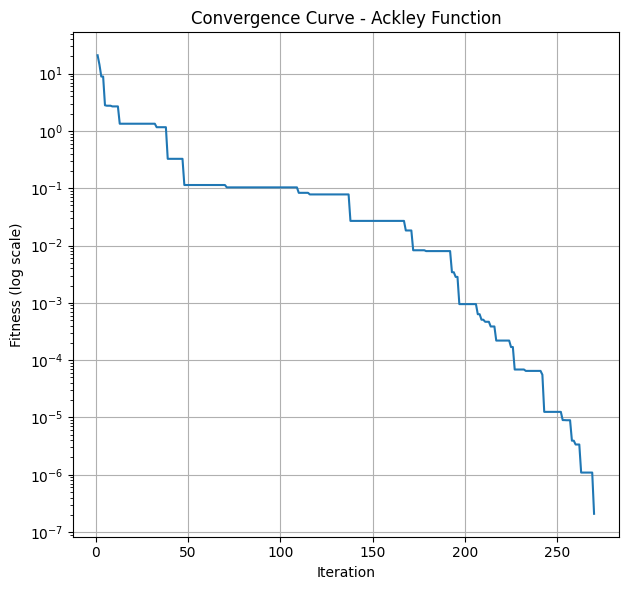

Best fitness: 2.081220138450135e-07
Best position: [-7.25472741e-08  1.22976372e-08]
Iterations performed: 270
Converged: Yes

Running Ackley Function with Config 2
Swarm size: 50, Iterations: 1000
Running 30 trials for Ackley Function with 50 particles and 1000 iterations...


  0%|          | 0/30 [00:00<?, ?it/s]


Statistics:
Mean fitness: 0.000001 ± 0.000000
Median fitness: 0.000001
Min/Max fitness: 0.000000 / 0.000001
Convergence rate: 100.00%
Average iterations: 407.17
Average runtime: 0.1910 seconds


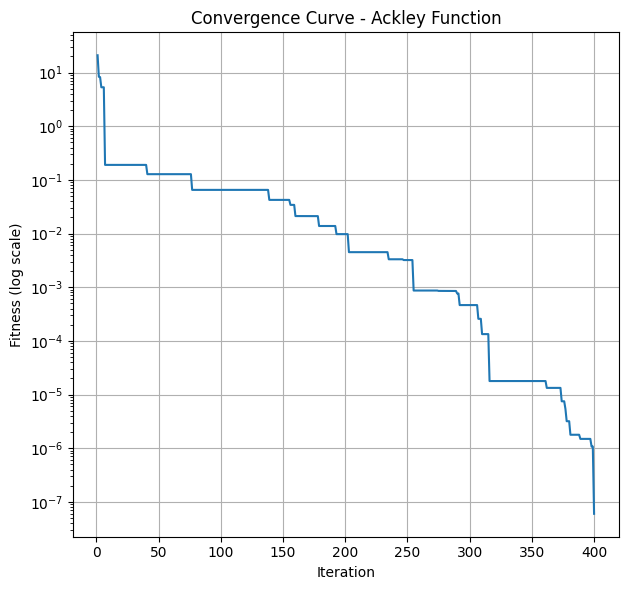

Best fitness: 5.988426821090798e-08
Best position: [ 1.07148899e-08 -1.82607960e-08]
Iterations performed: 400
Converged: Yes

Running Ackley Function with Config 3
Swarm size: 100, Iterations: 2000
Running 30 trials for Ackley Function with 100 particles and 2000 iterations...


  0%|          | 0/30 [00:00<?, ?it/s]


Statistics:
Mean fitness: 0.000001 ± 0.000000
Median fitness: 0.000001
Min/Max fitness: 0.000000 / 0.000001
Convergence rate: 100.00%
Average iterations: 570.73
Average runtime: 0.5189 seconds


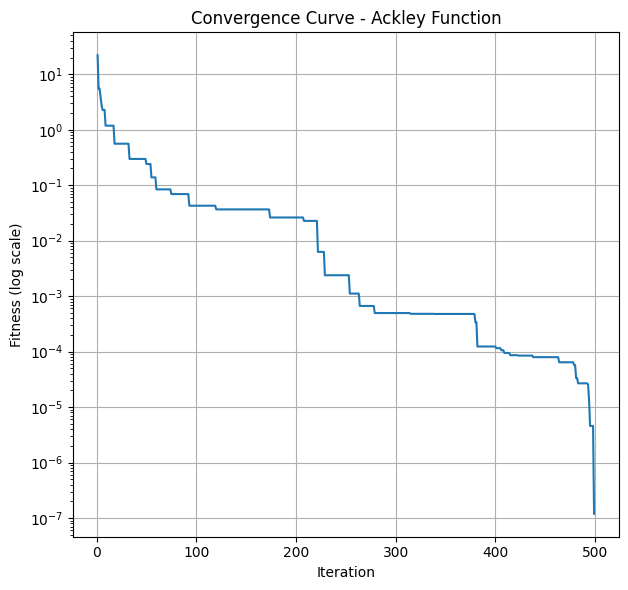

Best fitness: 1.1915134479068001e-07
Best position: [5.60330160e-09 4.17520293e-08]
Iterations performed: 499
Converged: Yes

Running Rosenbrock Function with Config 1
Swarm size: 30, Iterations: 500
Running 30 trials for Rosenbrock Function with 30 particles and 500 iterations...


  0%|          | 0/30 [00:00<?, ?it/s]


Statistics:
Mean fitness: 0.000001 ± 0.000000
Median fitness: 0.000001
Min/Max fitness: 0.000000 / 0.000001
Convergence rate: 100.00%
Average iterations: 320.67
Average runtime: 0.0412 seconds


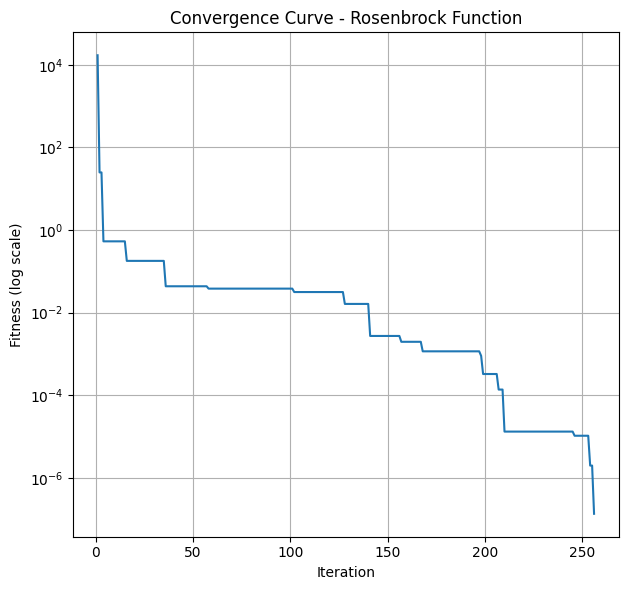

Best fitness: 1.3465988157295747e-07
Best position: [0.99968498 0.99935124]
Iterations performed: 256
Converged: Yes

Running Rosenbrock Function with Config 2
Swarm size: 50, Iterations: 1000
Running 30 trials for Rosenbrock Function with 50 particles and 1000 iterations...


  0%|          | 0/30 [00:00<?, ?it/s]


Statistics:
Mean fitness: 0.000001 ± 0.000000
Median fitness: 0.000001
Min/Max fitness: 0.000000 / 0.000001
Convergence rate: 100.00%
Average iterations: 414.47
Average runtime: 0.0812 seconds


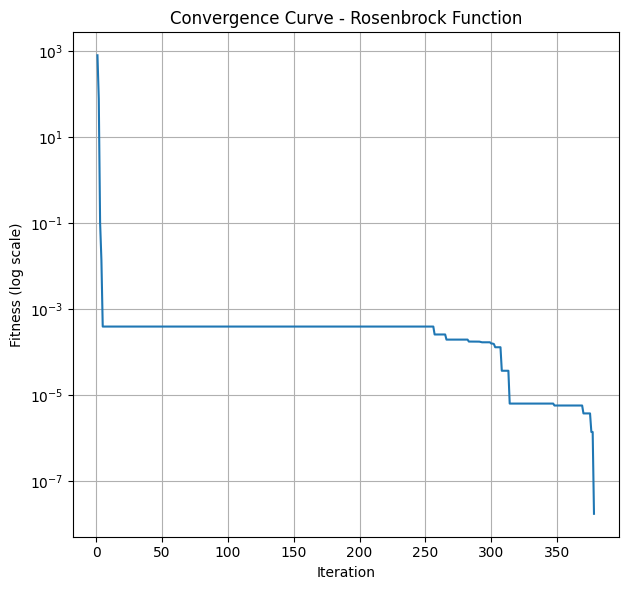

Best fitness: 1.7253098662674655e-08
Best position: [1.000127   1.00025737]
Iterations performed: 378
Converged: Yes

Running Rosenbrock Function with Config 3
Swarm size: 100, Iterations: 2000
Running 30 trials for Rosenbrock Function with 100 particles and 2000 iterations...


  0%|          | 0/30 [00:00<?, ?it/s]


Statistics:
Mean fitness: 0.000001 ± 0.000000
Median fitness: 0.000001
Min/Max fitness: 0.000000 / 0.000001
Convergence rate: 100.00%
Average iterations: 564.43
Average runtime: 0.2041 seconds


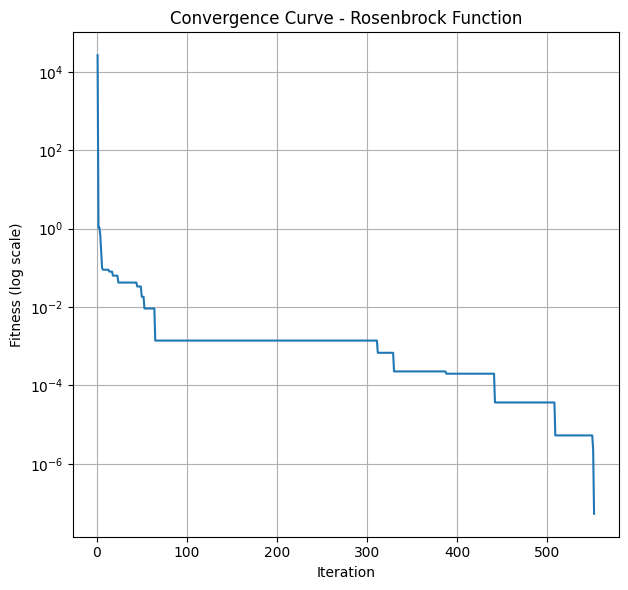

Best fitness: 5.3376512025273185e-08
Best position: [1.00021726 1.00042672]
Iterations performed: 552
Converged: Yes


In [3]:
summary = run_all_experiments()

In [4]:
summary

,function,configuration,swarm_size,iterations,mean_fitness,std_fitness,median_fitness,convergence_rate
0,Ackley Function,Config 1,30,500,6.959180e-07,2.678345e-07,8.042357e-07,100.0
1,Ackley Function,Config 2,50,1000,5.940682e-07,2.559164e-07,6.074992e-07,100.0
2,Ackley Function,Config 3,100,2000,6.966554e-07,2.458980e-07,7.096531e-07,100.0
3,Rosenbrock Function,Config 1,30,500,6.756154e-07,2.174759e-07,6.753029e-07,100.0
4,Rosenbrock Function,Config 2,50,1000,5.321249e-07,2.962703e-07,5.313234e-07,100.0
5,Rosenbrock Function,Config 3,100,2000,5.542700e-07,3.128016e-07,6.350314e-07,100.0
